In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [29]:
# Load the dataset
df = pd.read_csv('/Users/jenniferyau/Documents/Deakin unit/2023 T3/SIT782/Case/left_dev_res_bldg-2.csv')

df

,status,year_completed,clue_small_area,clue_block,street_address,property_id,resi_dwellings,studio_dwe,one_bdrm_dwe,two_bdrm_dwe,...,dwelling_number,construction_year,refurbished_year,number_of_floors_above_ground,predominant_space_use,accessibility_type,accessibility_type_description,accessibility_rating,bicycle_spaces,has_showers
0,COMPLETED,2006.0,North Melbourne,342,191-201 Abbotsford Street NORTH MELBOURNE VIC ...,100023,17,0,0,0,...,NaN,1890.0,NaN,2.0,Residential Apartment,Moderate level of accessibility,Main entrance has steps; Alternative entrance ...,2.0,0.0,NaN
1,COMPLETED,2005.0,North Melbourne,333,218-224 Abbotsford Street NORTH MELBOURNE VIC ...,100119,12,0,0,0,...,12.0,2005.0,NaN,3.0,Residential Apartment,Low level of accessibility,All entrances have steps,1.0,0.0,NaN
2,COMPLETED,2013.0,West Melbourne (Residential),414,56-62 Abbotsford Street WEST MELBOURNE VIC 3003,100144,3,0,0,0,...,3.0,1970.0,NaN,1.0,Wholesale,Not determined or not applicable,Building is not considered to be publicly acce...,0.0,NaN,NaN
3,COMPLETED,2014.0,West Melbourne (Residential),409,1-9 Stawell Street WEST MELBOURNE VIC 3003,100441,28,0,17,11,...,NaN,1888.0,2014.0,5.0,Residential Apartment,Not determined or not applicable,Configuration of entrance does not fit into an...,0.0,28.0,NaN
4,COMPLETED,2007.0,North Melbourne,1012,229-235 Arden Street NORTH MELBOURNE VIC 3051,100556,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,UNDER CONSTRUCTION,NaN,Carlton,245,86-94 Pelham Street CARLTON VIC 3053,107554,36,0,0,20,...,NaN,1983.0,NaN,3.0,Retail - Shop,Low level of accessibility,All entrances have steps,1.0,0.0,NaN
1170,UNDER CONSTRUCTION,NaN,East Melbourne,620,"250-260 Albert Street, East Melbourne, 3002",100361,23,0,0,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1171,UNDER CONSTRUCTION,NaN,Southbank,807,84-90 Queens Bridge Street SOUTHBANK VIC 3006,110440,372,0,140,161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1172,UNDER CONSTRUCTION,NaN,East Melbourne,621,364-370 Albert Street EAST MELBOURNE VIC 3002,100355,14,0,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
print(df.columns)

Index(['status', 'year_completed', 'clue_small_area', 'clue_block',
       'street_address', 'property_id', 'resi_dwellings', 'studio_dwe',
       'one_bdrm_dwe', 'two_bdrm_dwe', 'three_bdrm_dwe', 'student_apartments',
       'student_beds', 'student_accommodation_units',
       'institutional_accom_beds', 'hotel_rooms', 'serviced_apartments',
       'hotels_serviced_apartments', 'hostel_beds', 'childcare_places',
       'office_flr', 'retail_flr', 'industrial_flr', 'storage_flr',
       'education_flr', 'hospital_flr', 'recreation_flr', 'publicdispaly_flr',
       'community_flr', 'car_spaces', 'bike_spaces', 'longitude', 'latitude',
       'geopoint', 'census_year', 'dwelling_type', 'dwelling_number',
       'construction_year', 'refurbished_year',
       'number_of_floors_above_ground', 'predominant_space_use',
       'accessibility_type', 'accessibility_type_description',
       'accessibility_rating', 'bicycle_spaces', 'has_showers'],
      dtype='object')


In [31]:
df.isna().sum()

status                               0
year_completed                     270
clue_small_area                      0
clue_block                           0
street_address                       0
property_id                          0
resi_dwellings                       0
studio_dwe                           0
one_bdrm_dwe                         0
two_bdrm_dwe                         0
three_bdrm_dwe                       0
student_apartments                   0
student_beds                         0
student_accommodation_units          0
institutional_accom_beds             0
hotel_rooms                          0
serviced_apartments                  0
hotels_serviced_apartments           0
hostel_beds                          0
childcare_places                     0
office_flr                           0
retail_flr                           0
industrial_flr                       0
storage_flr                          0
education_flr                        0
hospital_flr             

## Data Clean and Pre-processing

In [32]:
# handle missing column for "year_completed" with median
df['year_completed'].fillna(df['year_completed'].median(), inplace=True)

In [33]:
# handle missing column for "construction_year" with median
df['construction_year'].fillna(df['construction_year'].median(), inplace=True)

# handle missing column for "refurbished_year" with median
df['refurbished_year'].fillna(df['refurbished_year'].median(), inplace=True)

In [34]:
# drop column "census_year", "dweliing_type", "dweliing_number", "has_showers" , "number_of_floors_above_ground "
df.drop('census_year', axis=1, inplace=True)

In [35]:
df.drop('street_address', axis=1, inplace=True)

In [36]:
df.drop('geopoint', axis=1, inplace=True)

In [37]:
df.drop('dwelling_type', axis=1, inplace=True)

In [38]:
df.drop('dwelling_number', axis=1, inplace=True)

In [39]:
df.drop('has_showers', axis=1, inplace=True)

In [40]:
df.drop('property_id', axis=1, inplace=True)

In [41]:
df.drop('number_of_floors_above_ground', axis=1, inplace=True)
df.drop('predominant_space_use', axis=1, inplace=True)
df.drop('accessibility_type', axis=1, inplace=True)
df.drop('accessibility_type_description', axis=1, inplace=True)
df.drop('accessibility_rating', axis=1, inplace=True)
df.drop('bicycle_spaces', axis=1, inplace=True)


In [42]:
# put column "clue_small_area", "status" into label encoding
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df['clue_small_area'] = labelencoder.fit_transform(df['clue_small_area'])
df['status'] = labelencoder.fit_transform(df['status'])

In [43]:
df

,status,year_completed,clue_small_area,clue_block,resi_dwellings,studio_dwe,one_bdrm_dwe,two_bdrm_dwe,three_bdrm_dwe,student_apartments,...,hospital_flr,recreation_flr,publicdispaly_flr,community_flr,car_spaces,bike_spaces,longitude,latitude,construction_year,refurbished_year
0,2,2006.0,6,342,17,0,0,0,0,0,...,0,0,0,0,0,0,144.945030,-37.802822,1890.0,2002.0
1,2,2005.0,6,333,12,0,0,0,0,0,...,0,0,0,0,0,0,144.945947,-37.802049,2005.0,2002.0
2,2,2013.0,12,414,3,0,0,0,3,0,...,0,0,0,0,0,0,144.944719,-37.806791,1970.0,2002.0
3,2,2014.0,12,409,28,0,17,11,0,0,...,0,0,0,0,0,28,144.942096,-37.806072,1888.0,2014.0
4,2,2007.0,6,1012,0,0,0,0,0,0,...,0,0,0,0,0,0,144.939286,-37.800374,1972.5,2002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,3,2012.0,0,245,36,0,0,20,16,0,...,0,0,0,0,56,137,144.964800,-37.802300,1983.0,2002.0
1170,3,2012.0,2,620,23,0,0,12,11,0,...,0,0,0,0,35,25,144.982577,-37.809940,1972.5,2002.0
1171,3,2012.0,10,807,372,0,140,161,71,0,...,0,0,0,0,111,153,144.959900,-37.825000,1972.5,2002.0
1172,3,2012.0,2,621,14,0,0,3,11,0,...,0,0,0,0,58,39,144.978950,-37.809569,1972.5,2002.0


In [44]:
print(df.describe())

            status  year_completed  clue_small_area   clue_block  \
count  1174.000000     1174.000000      1174.000000  1174.000000   
mean      1.830494     2012.412266         4.928450   516.663543   
std       0.562594        5.141018         3.591929   476.873074   
min       0.000000     2002.000000         0.000000     1.000000   
25%       2.000000     2010.000000         2.000000   104.000000   
50%       2.000000     2012.000000         4.000000   403.000000   
75%       2.000000     2016.000000         7.000000   781.000000   
max       3.000000     2023.000000        12.000000  2547.000000   

       resi_dwellings   studio_dwe  one_bdrm_dwe  two_bdrm_dwe  \
count     1174.000000  1174.000000   1174.000000   1174.000000   
mean        76.191652     1.161840     21.487223     26.979557   
std        155.269669     9.596961     60.291034     75.038061   
min          0.000000     0.000000      0.000000      0.000000   
25%          0.000000     0.000000      0.000000      0.0

## Time series analysis

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



## Target variable : resi_dwellings

In [46]:
# Print unique values in the 'clue_small_area' column
print(df['clue_small_area'].unique())


[ 6 12  0  5  4 11  9  3  1  7  2 10  8]


['North Melbourne' 'West Melbourne (Residential)' 'Carlton'
 'Melbourne (Remainder)' 'Melbourne (CBD)' 'West Melbourne (Industrial)'
 'South Yarra' 'Kensington' 'Docklands' 'Parkville' 'East Melbourne'
 'Southbank' 'Port Melbourne']

In [47]:
df

,status,year_completed,clue_small_area,clue_block,resi_dwellings,studio_dwe,one_bdrm_dwe,two_bdrm_dwe,three_bdrm_dwe,student_apartments,...,hospital_flr,recreation_flr,publicdispaly_flr,community_flr,car_spaces,bike_spaces,longitude,latitude,construction_year,refurbished_year
0,2,2006.0,6,342,17,0,0,0,0,0,...,0,0,0,0,0,0,144.945030,-37.802822,1890.0,2002.0
1,2,2005.0,6,333,12,0,0,0,0,0,...,0,0,0,0,0,0,144.945947,-37.802049,2005.0,2002.0
2,2,2013.0,12,414,3,0,0,0,3,0,...,0,0,0,0,0,0,144.944719,-37.806791,1970.0,2002.0
3,2,2014.0,12,409,28,0,17,11,0,0,...,0,0,0,0,0,28,144.942096,-37.806072,1888.0,2014.0
4,2,2007.0,6,1012,0,0,0,0,0,0,...,0,0,0,0,0,0,144.939286,-37.800374,1972.5,2002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,3,2012.0,0,245,36,0,0,20,16,0,...,0,0,0,0,56,137,144.964800,-37.802300,1983.0,2002.0
1170,3,2012.0,2,620,23,0,0,12,11,0,...,0,0,0,0,35,25,144.982577,-37.809940,1972.5,2002.0
1171,3,2012.0,10,807,372,0,140,161,71,0,...,0,0,0,0,111,153,144.959900,-37.825000,1972.5,2002.0
1172,3,2012.0,2,621,14,0,0,3,11,0,...,0,0,0,0,58,39,144.978950,-37.809569,1972.5,2002.0


Clue small area : 0 - Carlton

In [181]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area 
specific_area = 0

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2023-12-31    63.0
2024-12-31    63.0
2025-12-31    63.0
2026-12-31    63.0
2027-12-31    63.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_85923/796217429.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')


Clue small area : 1 - Docklands

In [182]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area 
specific_area = 1

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_85923/628351144.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')


Clue small area : 2 - East Melbourne

In [183]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area 
specific_area = 2

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_85923/1152637269.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')


Clue small area : 3 - Kensington

In [184]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area 
specific_area = 3

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    41.0
2025-12-31    41.0
2026-12-31    41.0
2027-12-31    41.0
2028-12-31    41.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_85923/130099135.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')


Clue small area : 4 - Melbourne (CBD)

In [185]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area 
specific_area = 4

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    2061.0
2025-12-31    2061.0
2026-12-31    2061.0
2027-12-31    2061.0
2028-12-31    2061.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_85923/2653540605.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')


Clue small area : 5 - Melbourne (Remainder) ## NEED TO TAKE OUT##

In [186]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area 
specific_area = 5

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2019-12-31    0.0
2020-12-31    0.0
2021-12-31    0.0
2022-12-31    0.0
2023-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_85923/3940068918.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')


Clue small area : 6 - North Melbourne

In [157]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area 
specific_area = 6

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)




2024-12-31    55.0
2025-12-31    55.0
2026-12-31    55.0
2027-12-31    55.0
2028-12-31    55.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_85923/3767171881.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')


Clue small area : 7 - Parkville

In [188]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area 
specific_area = 7

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)


2024-12-31    151.0
2025-12-31    151.0
2026-12-31    151.0
2027-12-31    151.0
2028-12-31    151.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_85923/256063072.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')


Clue small area : 8 - Port Melbourne

In [189]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area 
specific_area = 8

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)


2023-12-31    0.0
2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_85923/317488616.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')


Clue small area : 9 - South Yarra

In [190]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area 
specific_area = 9

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)


2024-12-31    8.0
2025-12-31    8.0
2026-12-31    8.0
2027-12-31    8.0
2028-12-31    8.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_85923/2433585916.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')


Clue small area : 10 - Southbank

In [191]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area 
specific_area = 10

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    175.0
2025-12-31    175.0
2026-12-31    175.0
2027-12-31    175.0
2028-12-31    175.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_85923/1187901778.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')


Clue small area : 11 - West Melbourne(Industrial)

In [192]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area 
specific_area = 11

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_85923/107560237.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
/Users/jenniferyau/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Clue small area : 12 - West Melbourne(Residential)

In [156]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'resi_dwellings'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['resi_dwellings'].sum().reset_index()

# Select a specific area 
specific_area = 12

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'resi_dwellings' by year
annual_data = area_data['resi_dwellings'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)


2024-12-31    330.0
2025-12-31    330.0
2026-12-31    330.0
2027-12-31    330.0
2028-12-31    330.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_85923/572466377.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')


## Target variable : studio_dwe

Clue small area : 0 - Carlton

In [48]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area 
specific_area = 0

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_25228/300673173.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')


2023-12-31    12.0
2024-12-31    12.0
2025-12-31    12.0
2026-12-31    12.0
2027-12-31    12.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


Clue small area : 1 - Docklands

In [49]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area 
specific_area = 1

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_25228/776602201.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')


Clue small area : 2 - East Melbourne

In [50]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area 
specific_area = 2

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_25228/3435222941.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
/Users/jenniferyau/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Clue small area : 3 - Kensington

In [51]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area 
specific_area = 3

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_25228/2653843553.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')


Clue small area : 4 - Melbourne (CBD)

In [52]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area 
specific_area = 4

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_25228/4223958601.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')


Clue small area : 5 - Melbourne (Remainder) ## NEED TO TAKE OUT##

In [54]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area 
specific_area = 5

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2019-12-31    0.0
2020-12-31    0.0
2021-12-31    0.0
2022-12-31    0.0
2023-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_25228/4024737341.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')


Clue small area : 6 - North Melbourne

In [55]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area 
specific_area = 6

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_25228/2321897152.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')


Clue small area : 7 - Parkville

In [56]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area 
specific_area = 7

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    1.232595e-32
2025-12-31    1.232595e-32
2026-12-31    1.232595e-32
2027-12-31    1.232595e-32
2028-12-31    1.232595e-32
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_25228/1743635744.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')


Clue small area : 8 - Pot Melbourne

In [57]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area 
specific_area = 8

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2023-12-31    0.0
2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_25228/1639967166.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
/Users/jenniferyau/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Clue small area : 9 - South Yarra

In [58]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area 
specific_area = 9

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_25228/3257976991.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
/Users/jenniferyau/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Clue small area : 10 - Southbank

In [59]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area 
specific_area = 10

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_25228/2208068269.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')


Clue small area : 11 - West Melbourne(Industrial)

In [60]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area 
specific_area = 11

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_25228/3144118683.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
/Users/jenniferyau/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Clue small area : 12 - West Melbourne(Residential)

In [61]:
# Convert 'year_completed' to datetime format for grouping by year
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

# Group by 'clue_small_area' and 'year_completed', then sum 'studio_dwe'
grouped_data = df.groupby(['clue_small_area', 'year_completed'])['studio_dwe'].sum().reset_index()

# Select a specific area 
specific_area = 12

# Filter data for the specific area
area_data = grouped_data[grouped_data['clue_small_area'] == specific_area]

# Convert 'year_completed' to datetime and set as index
area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')
area_data.set_index('year_completed', inplace=True)

# Aggregate 'studio_dwe' by year
annual_data = area_data['studio_dwe'].resample('A').sum()

# Fit the ARIMA model 
model = ARIMA(annual_data, order=(0, 1, 0))
model_fit = model.fit()

# Forecast for future years
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    0.0
2025-12-31    0.0
2026-12-31    0.0
2027-12-31    0.0
2028-12-31    0.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_25228/754199286.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['year_completed'] = pd.to_datetime(area_data['year_completed'], format='%Y')


## Visualization

In [1]:
import folium
import pandas as pd
import ipywidgets as widgets
from ipyleaflet import Map, Marker, MarkerCluster
from IPython.display import display

In [2]:
# Load the dataset
ln = pd.read_csv('/Users/jenniferyau/Documents/Deakin unit/2023 T3/SIT782/Case/Label encoding.csv')

In [3]:
ln

,No,area,Latitude,Longitude,Year,Forecast
0,0,Carlton,37.8808,144.9670,2023,63
1,0,Carlton,37.8808,144.9670,2024,63
2,0,Carlton,37.8808,144.9670,2025,63
3,0,Carlton,37.8808,144.9670,2026,63
4,0,Carlton,37.8808,144.9670,2027,63
...,...,...,...,...,...,...
56,12,West Melbourne (Residential,37.8089,144.9291,2024,330
57,12,West Melbourne (Residential,37.8089,144.9291,2025,330
58,12,West Melbourne (Residential,37.8089,144.9291,2026,330
59,12,West Melbourne (Residential,37.8089,144.9291,2027,330


In [4]:
ln.rename(columns={'Forecast ': 'Forecast'}, inplace=True)


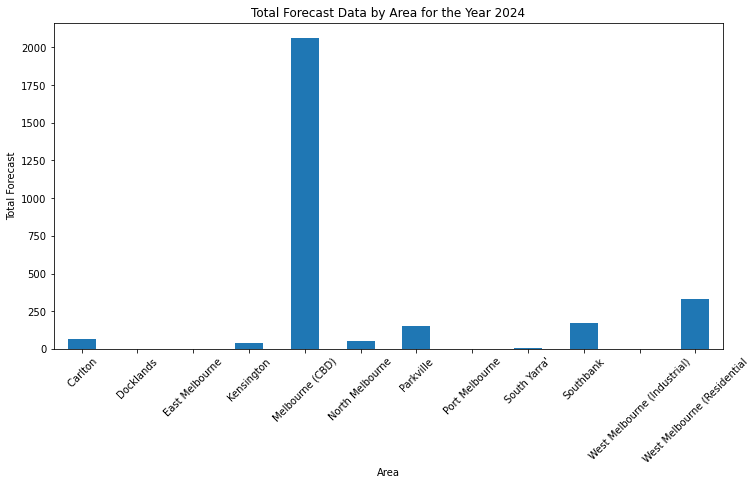

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
ln = pd.read_csv('/Users/jenniferyau/Documents/Deakin unit/2023 T3/SIT782/Case/Label encoding.csv')

ln.rename(columns=lambda x: x.strip(), inplace=True)

# Filter the data for the year 2024
year_to_plot = 2024  
ln_filtered = ln[ln['Year'] == year_to_plot]

# Aggregate forecast data by area for the filtered year
aggregated_data = ln_filtered.groupby('area')['Forecast'].sum()

# Plotting
plt.figure(figsize=(12, 6))
aggregated_data.plot(kind='bar')
plt.title(f'Total Forecast Data by Area for the Year {year_to_plot}')
plt.xlabel('Area')
plt.ylabel('Total Forecast')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



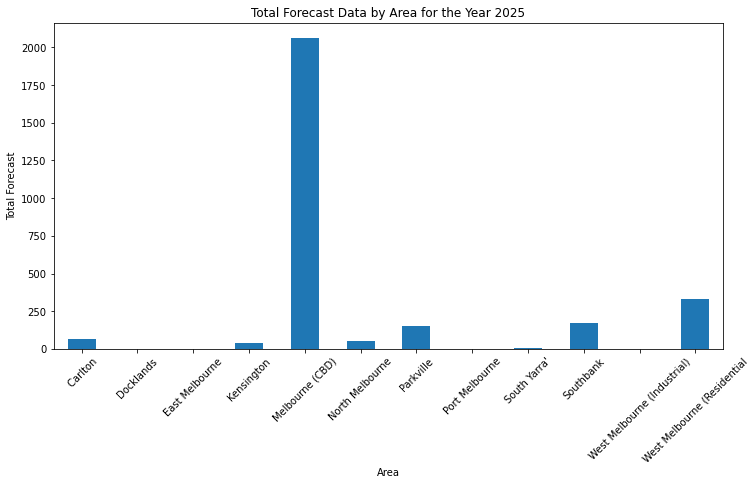

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
ln = pd.read_csv('/Users/jenniferyau/Documents/Deakin unit/2023 T3/SIT782/Case/Label encoding.csv')

ln.rename(columns=lambda x: x.strip(), inplace=True)

# Filter the data for the year 2025
year_to_plot = 2025  
ln_filtered = ln[ln['Year'] == year_to_plot]

# Aggregate forecast data by area for the filtered year
aggregated_data = ln_filtered.groupby('area')['Forecast'].sum()

# Plotting
plt.figure(figsize=(12, 6))
aggregated_data.plot(kind='bar')
plt.title(f'Total Forecast Data by Area for the Year {year_to_plot}')
plt.xlabel('Area')
plt.ylabel('Total Forecast')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


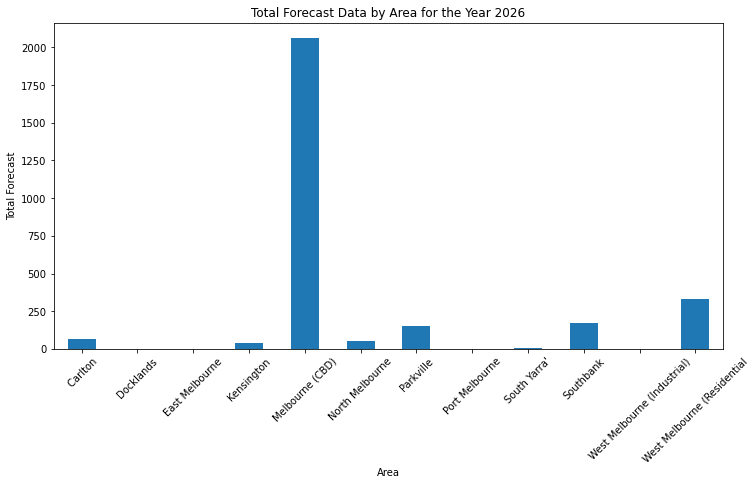

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
ln = pd.read_csv('/Users/jenniferyau/Documents/Deakin unit/2023 T3/SIT782/Case/Label encoding.csv')

ln.rename(columns=lambda x: x.strip(), inplace=True)

# Filter the data for the year 2026
year_to_plot = 2026  
ln_filtered = ln[ln['Year'] == year_to_plot]

# Aggregate forecast data by area for the filtered year
aggregated_data = ln_filtered.groupby('area')['Forecast'].sum()

# Plotting
plt.figure(figsize=(12, 6))
aggregated_data.plot(kind='bar')
plt.title(f'Total Forecast Data by Area for the Year {year_to_plot}')
plt.xlabel('Area')
plt.ylabel('Total Forecast')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


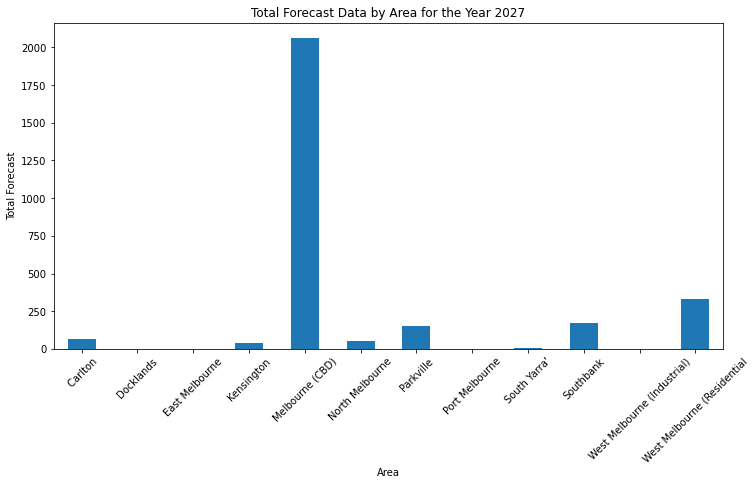

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
ln = pd.read_csv('/Users/jenniferyau/Documents/Deakin unit/2023 T3/SIT782/Case/Label encoding.csv')

ln.rename(columns=lambda x: x.strip(), inplace=True)

# Filter the data for the year 2027
year_to_plot = 2027  
ln_filtered = ln[ln['Year'] == year_to_plot]

# Aggregate forecast data by area for the filtered year
aggregated_data = ln_filtered.groupby('area')['Forecast'].sum()

# Plotting
plt.figure(figsize=(12, 6))
aggregated_data.plot(kind='bar')
plt.title(f'Total Forecast Data by Area for the Year {year_to_plot}')
plt.xlabel('Area')
plt.ylabel('Total Forecast')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


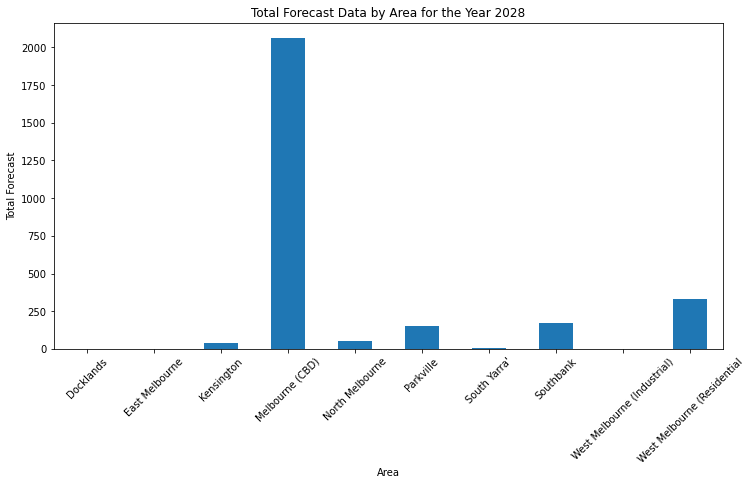

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
ln = pd.read_csv('/Users/jenniferyau/Documents/Deakin unit/2023 T3/SIT782/Case/Label encoding.csv')

ln.rename(columns=lambda x: x.strip(), inplace=True)

# Filter the data for the year 2028
year_to_plot = 2028  
ln_filtered = ln[ln['Year'] == year_to_plot]

# Aggregate forecast data by area for the filtered year
aggregated_data = ln_filtered.groupby('area')['Forecast'].sum()

# Plotting
plt.figure(figsize=(12, 6))
aggregated_data.plot(kind='bar')
plt.title(f'Total Forecast Data by Area for the Year {year_to_plot}')
plt.xlabel('Area')
plt.ylabel('Total Forecast')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [27]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the dataset
ln = pd.read_csv('/Users/jenniferyau/Documents/Deakin unit/2023 T3/SIT782/Case/Label encoding.csv')
ln.rename(columns={'Forecast ': 'Forecast'}, inplace=True)

# Filter data for a specific year (optional)
year_to_plot = 2028
ln_filtered = ln[ln['Year'] == year_to_plot]

# Create a map centered at a general location
m = folium.Map(location=[-37.814, 144.96332], zoom_start=12)

# Prepare data for the heatmap
heat_data = [[row['Latitude'], row['Longitude'], row['Forecast']] for index, row in ln_filtered.iterrows()]

# Create a HeatMap layer with additional options
heat_layer = HeatMap(
    heat_data, 
    min_opacity=0.5, 
    max_val=max(ln_filtered['Forecast']), 
    radius=25,  # Increase the radius if points are too sparse
    blur=15,  # Adjust the blur intensity
    gradient={0.2: 'blue', 0.4: 'green', 0.6: 'yellow', 0.8: 'orange', 1: 'red'}  # Color gradient
)

# Add the heatmap layer to the map
m.add_child(heat_layer)

# Add layer control to toggle the heatmap
folium.LayerControl().add_to(m)

# Display the map
m


/var/folders/r2/yrvsgvhj0g35b1g97r7v6hwh0000gn/T/ipykernel_25228/2275740601.py:20: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heat_layer = HeatMap(
